In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({
    'font.family': 'Times New Roman',
    'axes.titlesize': 20,
    'axes.titleweight': 'bold',
    'axes.labelsize': 16,
    'axes.labelweight': 'regular',
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
})

sns.set_context('talk')
sns.set_style('whitegrid')

df = pd.read_excel(r"data\new\EVRegistrations\data.xlsx", "NJAFVRprtRegCntySummary202406")
df.head()

,County,VehClass,Vehicles,ICE,NonAFV %,AFVs,AFV %,HEV,HEV %,NEV,NEV %,PHEV,PHEV %,BEV,BEV %,BEV plus PHEV,BEV plus PHEV %,NG,NG %
0,Atlantic,HDT,4982.0,4818.0,0.967081,164.0,0.032919,NaN,0.00000,NaN,0.0,NaN,0.000000,NaN,0.000000,0.0,0.000000,164.0,0.032919
1,Atlantic,LDT,119511.0,115436.0,0.965903,4075.0,0.034097,2340.0,0.01958,NaN,0.0,561.0,0.004694,1169.0,0.009782,1730.0,0.014476,5.0,0.000042
2,Atlantic,LDV,72683.0,69393.0,0.954735,3290.0,0.045265,2179.0,0.02998,NaN,0.0,266.0,0.003660,839.0,0.011543,1105.0,0.015203,6.0,0.000083
3,Atlantic,LSV,297.0,NaN,0.000000,297.0,1.000000,NaN,0.00000,297.0,1.0,NaN,0.000000,NaN,0.000000,0.0,0.000000,NaN,0.000000
4,Atlantic,MDT,9663.0,9569.0,0.990272,94.0,0.009728,NaN,0.00000,NaN,0.0,NaN,0.000000,43.0,0.004450,43.0,0.004450,51.0,0.005278


In [77]:
# remove percentages
df = df.loc[:, ~df.columns.str.contains('%')]
df.head(2)


,County,VehClass,Vehicles,ICE,AFVs,HEV,NEV,PHEV,BEV,BEV plus PHEV,NG
0,Atlantic,HDT,4982.0,4818.0,164.0,NaN,NaN,NaN,NaN,0.0,164.0
1,Atlantic,LDT,119511.0,115436.0,4075.0,2340.0,NaN,561.0,1169.0,1730.0,5.0


In [78]:
# replace NaN with 0
df.fillna(0, inplace=True)


In [79]:
# convert all columns except County and VehClass to number
df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
df.head()


,County,VehClass,Vehicles,ICE,AFVs,HEV,NEV,PHEV,BEV,BEV plus PHEV,NG
0,Atlantic,HDT,4982.0,4818.0,164.0,0.0,0.0,0.0,0.0,0.0,164.0
1,Atlantic,LDT,119511.0,115436.0,4075.0,2340.0,0.0,561.0,1169.0,1730.0,5.0
2,Atlantic,LDV,72683.0,69393.0,3290.0,2179.0,0.0,266.0,839.0,1105.0,6.0
3,Atlantic,LSV,297.0,0.0,297.0,0.0,297.0,0.0,0.0,0.0,0.0
4,Atlantic,MDT,9663.0,9569.0,94.0,0.0,0.0,0.0,43.0,43.0,51.0


In [80]:
df.head()

,County,VehClass,Vehicles,ICE,AFVs,HEV,NEV,PHEV,BEV,BEV plus PHEV,NG
0,Atlantic,HDT,4982.0,4818.0,164.0,0.0,0.0,0.0,0.0,0.0,164.0
1,Atlantic,LDT,119511.0,115436.0,4075.0,2340.0,0.0,561.0,1169.0,1730.0,5.0
2,Atlantic,LDV,72683.0,69393.0,3290.0,2179.0,0.0,266.0,839.0,1105.0,6.0
3,Atlantic,LSV,297.0,0.0,297.0,0.0,297.0,0.0,0.0,0.0,0.0
4,Atlantic,MDT,9663.0,9569.0,94.0,0.0,0.0,0.0,43.0,43.0,51.0


In [81]:
# Group by 'VehClass' and sum only numeric columns
df_combined = df.groupby('VehClass', as_index=False).sum(numeric_only=True)
df_combined.head()

,VehClass,Vehicles,ICE,AFVs,HEV,NEV,PHEV,BEV,BEV plus PHEV,NG
0,0,13844632.0,13140105.0,704526.0,335027.0,10754.0,82297.0,269415.0,351712.0,7033.0
1,202212,6692383.0,6467634.0,224748.0,125757.0,3053.0,23101.0,68414.0,91515.0,4423.0
2,202306,6822411.0,6549830.0,272580.0,139937.0,4823.0,28454.0,95097.0,123551.0,4269.0
3,202312,6847398.0,6532279.0,315119.0,152023.0,5014.0,35617.0,118536.0,154153.0,3929.0
4,HDT,177585.0,176120.0,1465.0,15.0,0.0,2.0,118.0,120.0,1330.0


In [82]:
# remove VehClass that is 0 or some number
df_combined = df_combined[(df_combined['VehClass'] != 0) & (~df_combined['VehClass'].astype(str).str.isnumeric())]
df_combined.head(10)


,VehClass,Vehicles,ICE,AFVs,HEV,NEV,PHEV,BEV,BEV plus PHEV,NG
4,HDT,177585.0,176120.0,1465.0,15.0,0.0,2.0,118.0,120.0,1330.0
5,LDT,3976248.0,3772086.0,204162.0,90850.0,0.0,32198.0,81009.0,113207.0,105.0
6,LDV,2446863.0,2298324.0,148538.0,81122.0,0.0,10881.0,56465.0,67346.0,70.0
7,LSV,5661.0,26.0,5635.0,0.0,5635.0,0.0,0.0,0.0,0.0
8,MDT,299056.0,295632.0,3424.0,1.0,0.0,0.0,3169.0,3169.0,254.0
9,MotorHome,10389.0,10387.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0
10,Other Bus,13531.0,12990.0,541.0,44.0,0.0,0.0,79.0,79.0,418.0
11,School Bus,18837.0,17135.0,1702.0,0.0,0.0,0.0,24.0,24.0,1678.0


C:\Users\akash\AppData\Local\Temp\ipykernel_27096\2908038925.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_combined, x='VehClass', y='Vehicles', palette='viridis')


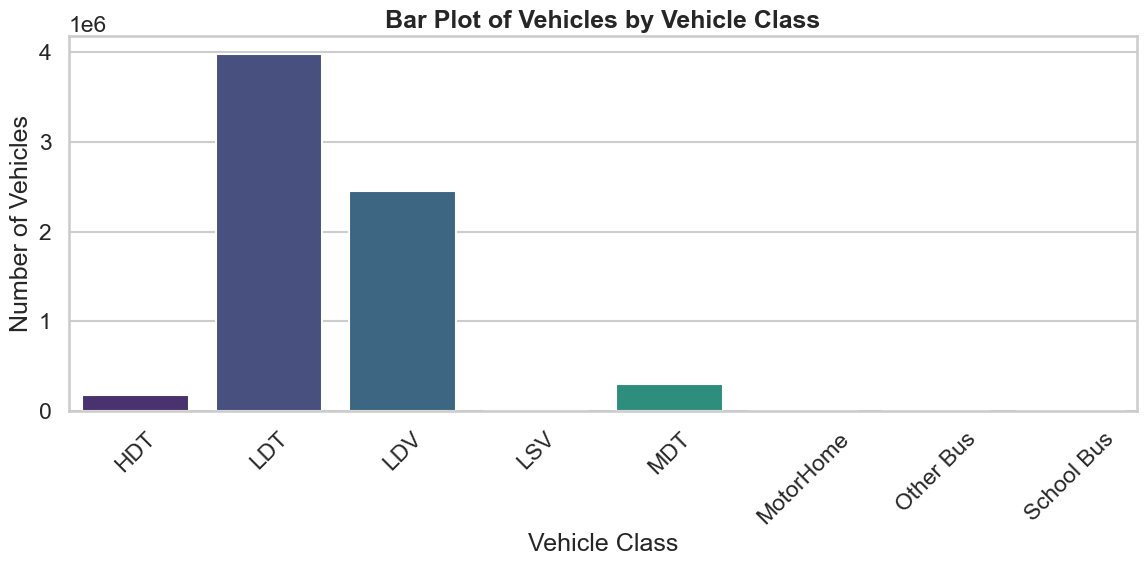

In [83]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_combined, x='VehClass', y='Vehicles', palette='viridis')

# Add titles and labels
plt.title('Bar Plot of Vehicles by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\akash\AppData\Local\Temp\ipykernel_27096\1088204989.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_combined_sorted, x='VehClass', y='Vehicles', palette='viridis')


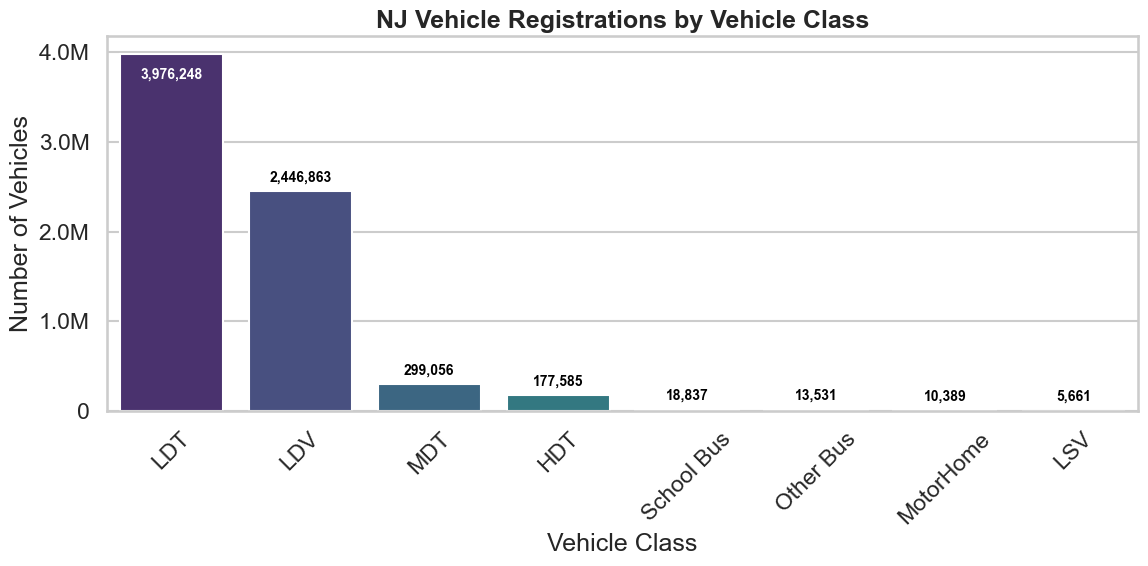

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Sort the DataFrame by 'Vehicles' in decreasing order
df_combined_sorted = df_combined.sort_values('Vehicles', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_combined_sorted, x='VehClass', y='Vehicles', palette='viridis')

# Add titles and labels
plt.title('NJ Vehicle Registrations by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)

# Format the y-axis ticks to have formatting like (2.3k, 12.2M, etc.)
def format_large_numbers(x, pos):
    if x >= 1_000_000:
        return f'{x*1e-6:.1f}M'
    elif x >= 1_000:
        return f'{x*1e-3:.1f}k'
    else:
        return str(int(x))

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_large_numbers))

# Add labels to the bars showing the number of vehicles
for i, p in enumerate(plt.gca().patches):
    label = f'{int(p.get_height()):,}'
    # Position the first label below the bar and the others above
    y_offset = -15 if i == 0 else 10
    plt.gca().annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=10, color='white' if i == 0 else 'black', fontweight='bold', 
                       xytext=(0, y_offset), textcoords='offset points')

plt.tight_layout()

# Show the plot
plt.show()


C:\Users\akash\AppData\Local\Temp\ipykernel_27096\3353407575.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], data=df_top4, x='VehClass', y='Vehicles', palette='viridis')
C:\Users\akash\AppData\Local\Temp\ipykernel_27096\3353407575.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], data=df_bottom4, x='VehClass', y='Vehicles', palette='magma')


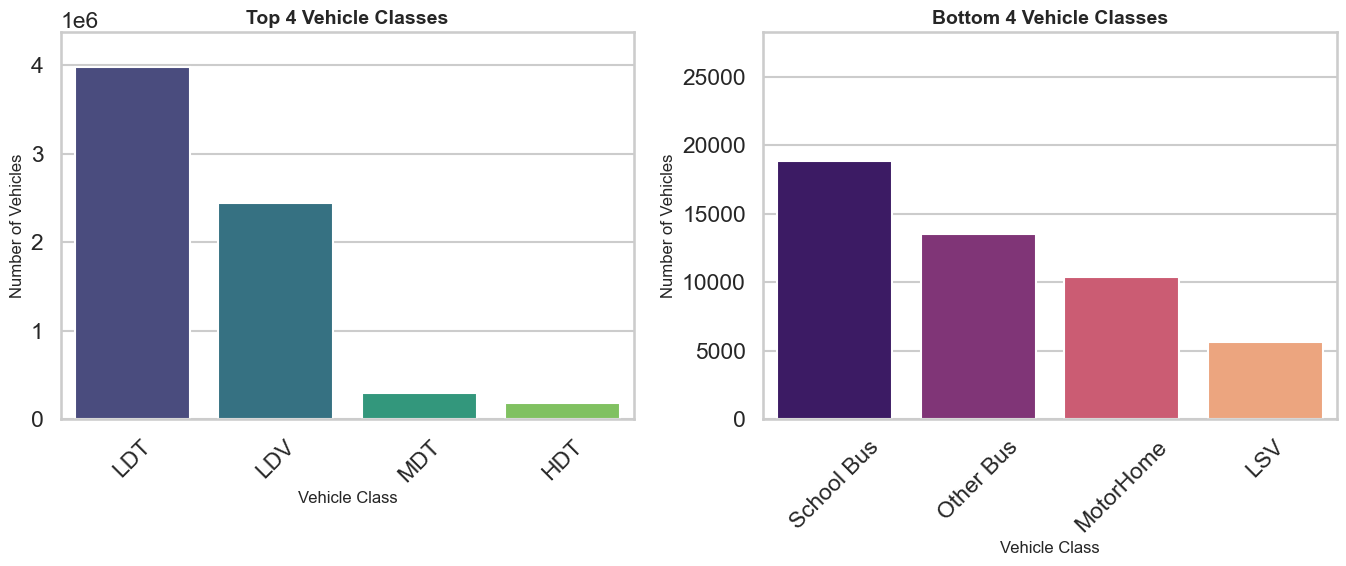

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the data by the 'Vehicles' column
df_sorted = df_combined.sort_values(by='Vehicles', ascending=False)

# Get the top 4 and bottom 4 vehicle classes
df_top4 = df_sorted.head(4)
df_bottom4 = df_sorted.tail(4)

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Remove sharey=True

# Plot the top 4 vehicle classes
sns.barplot(ax=axes[0], data=df_top4, x='VehClass', y='Vehicles', palette='viridis')
axes[0].set_title('Top 4 Vehicle Classes', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Vehicle Class', fontsize=12)
axes[0].set_ylabel('Number of Vehicles', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Plot the bottom 4 vehicle classes
sns.barplot(ax=axes[1], data=df_bottom4, x='VehClass', y='Vehicles', palette='magma')
axes[1].set_title('Bottom 4 Vehicle Classes', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Vehicle Class', fontsize=12)
axes[1].set_ylabel('Number of Vehicles', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Set different y-axis limits
axes[0].set_ylim(0, df_top4['Vehicles'].max() * 1.1)  # Slightly above the top value
axes[1].set_ylim(0, df_bottom4['Vehicles'].max() * 1.5)  # Adjust scale for bottom 4

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [68]:
# get the column names of the top four vehicle classes
top_four = df_combined.nlargest(4, 'Vehicles')['VehClass']
top_four

5    LDT
6    LDV
8    MDT
4    HDT
Name: VehClass, dtype: object

In [69]:
df_combined.drop(columns=['Vehicles', 'AFVs', 'BEV plus PHEV'], inplace=True, errors='ignore')


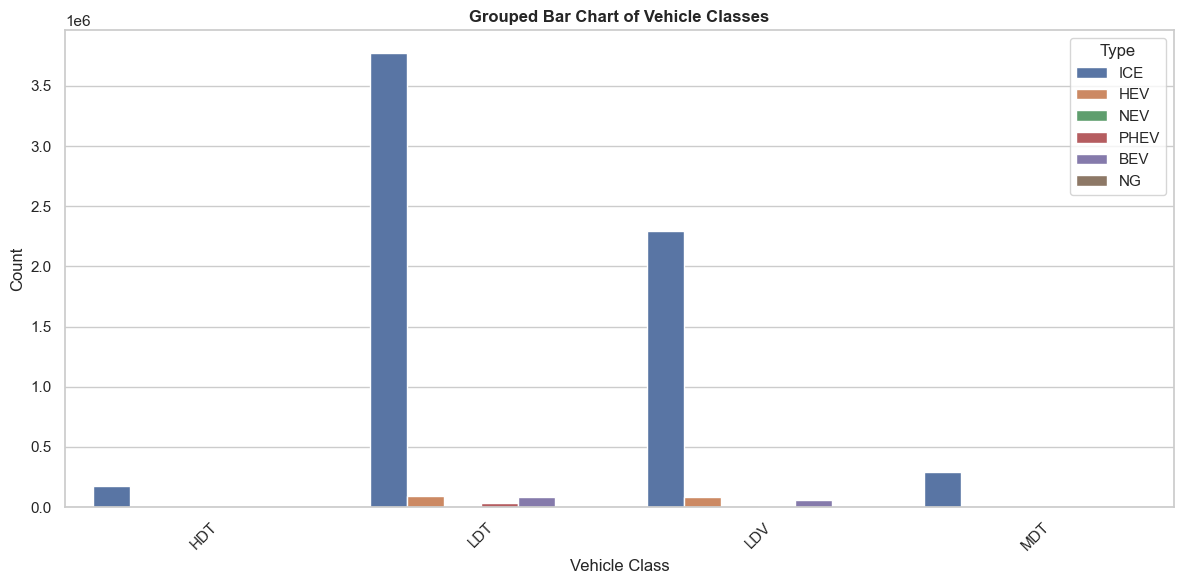

In [70]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Melt the DataFrame to long format for seaborn
df_melted = df_combined.melt(id_vars='VehClass', var_name='Type', value_name='Count')

# only keep the top four vehicle classes
df_melted = df_melted[df_melted['VehClass'].isin(top_four)]

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='VehClass', y='Count', hue='Type')

# Add titles and labels
plt.title('Grouped Bar Chart of Vehicle Classes')
plt.xlabel('Vehicle Class')
plt.ylabel('Count')
plt.legend(title='Type')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


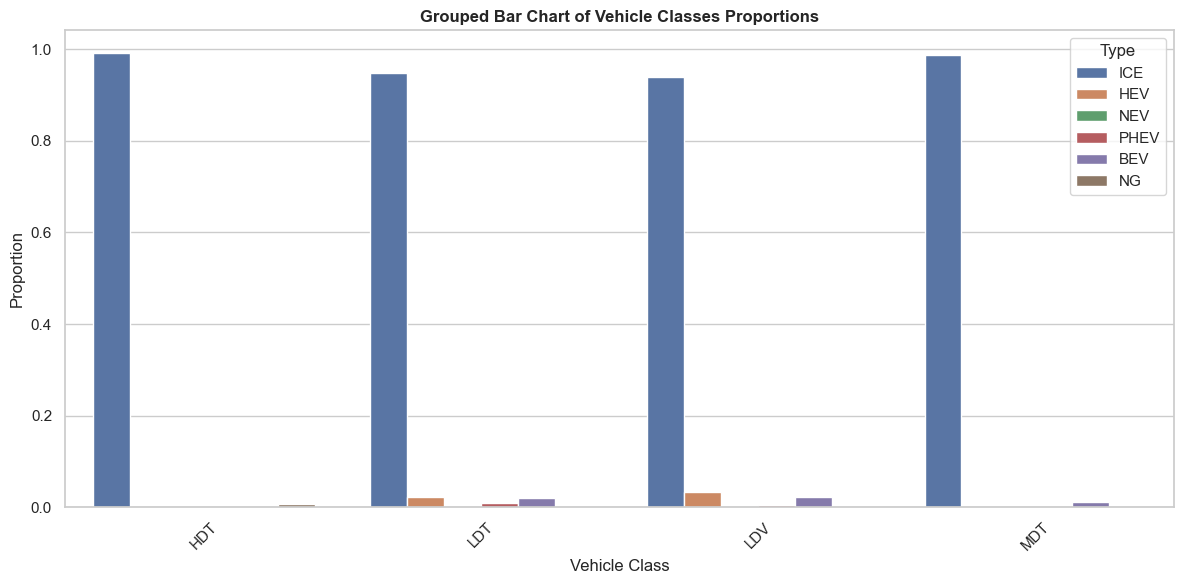

In [71]:
# Calculate proportions
df_proportions = df_combined.copy()
df_proportions.iloc[:, 1:] = df_proportions.iloc[:, 1:].div(df_proportions.iloc[:, 1:].sum(axis=1), axis=0)

# Melt the DataFrame to long format for seaborn
df_melted_proportions = df_proportions.melt(id_vars='VehClass', var_name='Type', value_name='Proportion')

# only keep the top four vehicle classes
df_melted_proportions = df_melted_proportions[df_melted_proportions['VehClass'].isin(top_four)]

# Create a grouped bar chart for proportions
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted_proportions, x='VehClass', y='Proportion', hue='Type')

# Add titles and labels
plt.title('Grouped Bar Chart of Vehicle Classes Proportions')
plt.xlabel('Vehicle Class')
plt.ylabel('Proportion')
plt.legend(title='Type')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

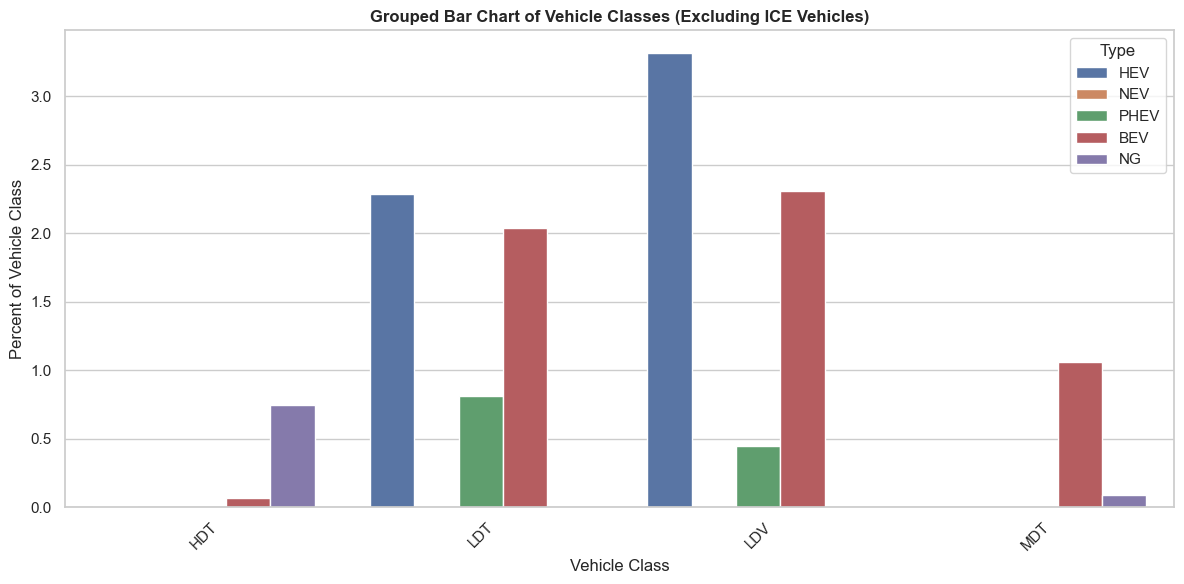

In [72]:
# Create a new DataFrame excluding ICE vehicles
df_no_ice = df_proportions.drop(columns=['ICE'])

# multiply by 100 to get percentage
df_no_ice.iloc[:, 1:] = df_no_ice.iloc[:, 1:] * 100

# Melt the DataFrame to long format for seaborn
df_melted_no_ice = df_no_ice.melt(id_vars='VehClass', var_name='Type', value_name='Count')

# only keep the top four vehicle classes
df_melted_no_ice = df_melted_no_ice[df_melted_no_ice['VehClass'].isin(top_four)]

# Create a grouped bar chart without ICE vehicles
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted_no_ice, x='VehClass', y='Count', hue='Type')

# Add titles and labels
plt.title('Grouped Bar Chart of Vehicle Classes (Excluding ICE Vehicles)')
plt.xlabel('Vehicle Class')
plt.ylabel('Percent of Vehicle Class')
plt.legend(title='Type')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\akash\AppData\Local\Temp\ipykernel_27096\707684046.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = pivot_table.applymap(lambda x: f"{x:.1f}%" if x >= 0.1 else "")


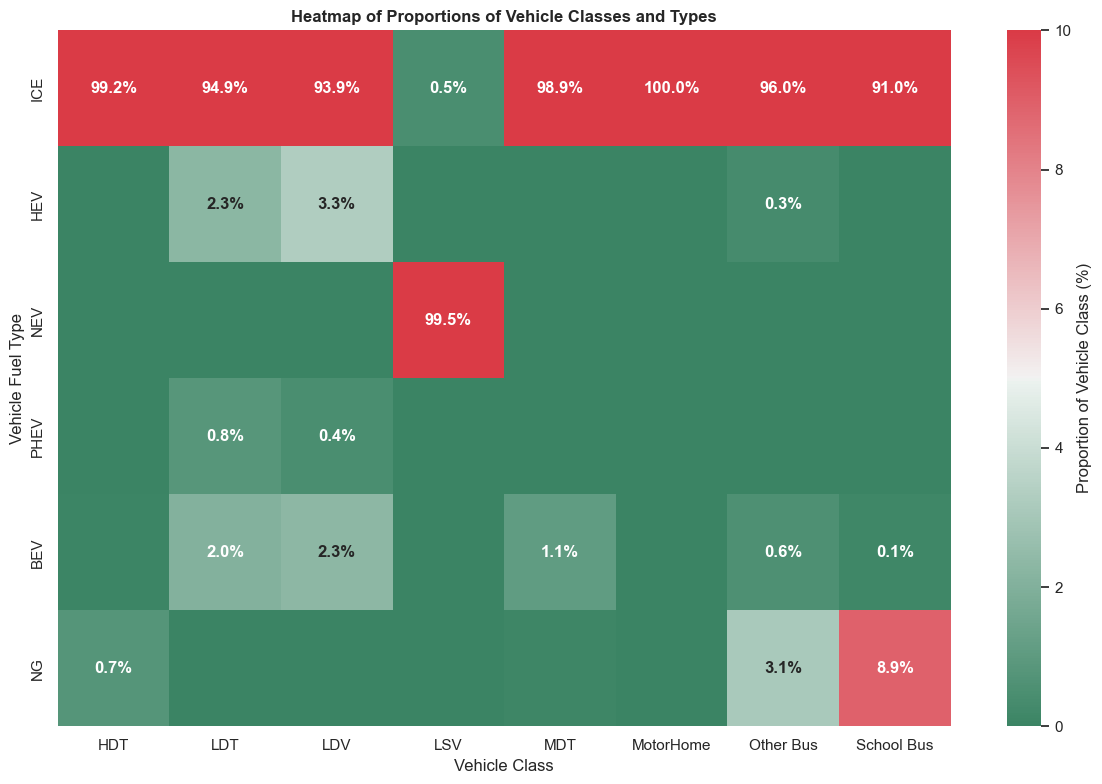

In [75]:
import numpy as np

# Create a heatmap for the proportions of all vehicle classes and types
plt.figure(figsize=(12, 8))
pivot_table = df_proportions.set_index('VehClass').T  # Transpose for heatmap

# Multiply by 100 to get percentage
pivot_table = pivot_table * 100

# Create a mask for annotations (only show text for non-zero values)
annot = pivot_table.applymap(lambda x: f"{x:.1f}%" if x >= 0.1 else "")

# Create heatmap with adjusted color mapping
sns.heatmap(
    pivot_table,
    annot=annot.values,
    fmt="",  # Prevent seaborn from formatting the values
    cmap=sns.diverging_palette(150, 10, as_cmap=True),
    cbar_kws={'label': 'Proportion of Vehicle Class (%)'},
    vmin=0,  # Minimum value for color scaling
    vmax=10,  # Maximum value to highlight smaller proportions better
    annot_kws={"fontweight": "bold"}  # Bold annotations
)
plt.title('Heatmap of Proportions of Vehicle Classes and Types')
plt.xlabel('Vehicle Class')
plt.ylabel('Vehicle Fuel Type')
plt.tight_layout()

# Show the plot
plt.show()
